# UNLP Machine Learning - TP2
---------------------------------------
* **Autores:** 
    - Emiliano Bohorquez
    - Brayan A. Condori Luque
    - Milagros Onofri
* **Objetivo:** Este notebook analiza los datos de forma descriptiva y predictiva.
---------------------------------------

**Fecha de Creación:** 2024-12-14

**Fecha de Actualización:** 2024-12-14

In [1]:
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import cross_val_score, LeaveOneOut, KFold
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Definimos las rutas de los archivos
TEST_FINAL = "../stores/test_set_final.csv"
TRAIN_FINAL = "../stores/train_set_final.csv"

In [3]:
train_set = pd.read_csv(TRAIN_FINAL, sep=",")
train_set = train_set.drop(columns=["Unnamed: 0"])
train_set

,id,Ingtot,Ingtotob,Mujer,Varon,anios_educ_head,hs_work_head,infancia,ing_capital,subsidio,...,Fex_c,Fex_dpto,Ingtot_log,Ingtotob_log,Ingtotug_log,Ingtotugarr_log,Ingpcug_log,P5130_log,mayoria_infancia,gen_relativo
0,00004a3f76ed8c33d84a5c70,1076429.42,1076429.42,3,2,11.00,NaN,3,0,0.20,...,535.09,243.97,13.89,13.89,13.89,14.10,12.49,12.43,0.60,0.67
1,000088edf78cfaaf1791beba,1032500.00,1032500.00,2,1,5.00,NaN,1,0,0.00,...,48.64,80.15,13.85,13.85,13.85,13.85,12.75,NaN,0.33,0.50
2,00009b13480f6770b6a4d1e9,1800000.00,1800000.00,1,2,3.00,50.00,1,0,0.00,...,18.83,15.89,14.40,14.40,14.40,14.73,13.63,13.46,0.33,2.00
3,0000b1899fb63a7bf0b73ccf,640000.00,640000.00,1,1,0.00,48.00,0,0,0.00,...,48.19,87.44,13.37,13.37,13.37,13.47,12.78,11.16,0.00,1.00
4,0000f3ec65ccacadfcc59f32,1812492.00,1812492.00,2,1,3.00,NaN,0,0,0.00,...,11.18,10.07,14.41,14.41,14.41,14.59,13.49,12.77,0.00,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164955,fffdd1840d9683d328b17ac1,1607500.00,1607500.00,1,1,8.00,NaN,0,1,0.00,...,143.53,191.47,14.29,14.29,14.29,14.65,13.96,13.46,0.00,1.00
164956,fffe6982a5a945d769ff5893,956119.67,956119.67,2,1,5.00,48.00,1,0,0.33,...,101.21,94.03,13.77,13.77,13.77,13.77,12.67,NaN,0.33,0.50
164957,fffeb473112bf14d6b9da295,760000.00,760000.00,3,1,3.00,21.00,2,0,0.00,...,201.08,103.25,13.54,13.54,13.54,13.54,12.15,10.31,0.50,0.33
164958,ffff32451ed4afe313eb8e8d,400000.00,0.00,2,1,5.00,105.00,1,0,0.00,...,30.89,23.02,12.90,0.00,12.90,12.90,11.80,NaN,0.33,0.50


In [4]:
train_set.columns

Index(['id', 'Ingtot', 'Ingtotob', 'Mujer', 'Varon', 'anios_educ_head',
       'hs_work_head', 'infancia', 'ing_capital', 'subsidio', 'Clase', 'P5000',
       'P5010', 'P5100', 'P5130', 'P5140', 'Nper', 'Npersug', 'Ingtotug',
       'Ingtotugarr', 'Ingpcug', 'Li', 'Lp', 'Pobre', 'Indigente', 'Npobres',
       'Nindigentes', 'Depto', 'P5090_Alquilada', 'P5090_Otro', 'P5090_Propia',
       'P5090_Tomada', 'hacinamiento', 'Dominio', 'Fex_c', 'Fex_dpto',
       'Ingtot_log', 'Ingtotob_log', 'Ingtotug_log', 'Ingtotugarr_log',
       'Ingpcug_log', 'P5130_log', 'mayoria_infancia', 'gen_relativo'],
      dtype='object')

In [35]:
# La función summarize busca replicar el comando del mismo nombre que se utiliza en STATA.

def summarize(df, x, ponder):
    """
    Función que devuelve una tabla de estadísticas principales con ponderadores
    
    """
    mean_w = np.average(df[x], weights = df[ponder]) # Obtención de la media ponderada
    std_w = np.sqrt(
    np.average(
        (df[x] - np.average(df[x], weights=df[ponder]))**2,
        weights=df[ponder]
    ) * (len(df[x]) / (len(df[x]) - 1)) # Cálculo manual del desvío estandar ajustandolo por N-1 grados de libertad
)

    total_obs = df[ponder].sum() # Total de observaciones en función de la sumatoria de la columna del ponderador
    minimo = df[x].min() # El valor mínimo del conjunto de datos
    maximo = df[x].max() # El valor máximo del conjunto de datos
    return mean_w, std_w, total_obs, minimo, maximo

In [36]:
train_set["ponder"] = 1

In [37]:
train_set.dtypes


id                   object
Ingtot              float64
Ingtotob            float64
Mujer                 int64
Varon                 int64
anios_educ_head     float64
hs_work_head        float64
infancia              int64
ing_capital           int64
subsidio            float64
Clase                 int64
P5000                 int64
P5010                 int64
P5100               float64
P5130               float64
P5140               float64
Nper                  int64
Npersug               int64
Ingtotug            float64
Ingtotugarr         float64
Ingpcug             float64
Li                  float64
Lp                  float64
Pobre                 int64
Indigente             int64
Npobres               int64
Nindigentes           int64
Depto                 int64
P5090_Alquilada       int64
P5090_Otro            int64
P5090_Propia          int64
P5090_Tomada          int64
hacinamiento        float64
Dominio              object
Fex_c               float64
Fex_dpto            

In [38]:
numeric_columns = train_set.select_dtypes(include=[np.number]).columns
summary_stats = {col: summarize(train_set, col, "ponder") for col in numeric_columns}
summary_stats

{'Ingtot': (2102585.768979283,
  2532552.3920253343,
  164960,
  0.0,
  85833333.3333333),
 'Ingtotob': (1803343.1188095447,
  2349000.5674734935,
  164960,
  0.0,
  85833333.3333333),
 'Mujer': (1.7404037342386034, 1.1797312778577131, 164960, 0, 14),
 'Varon': (1.5519641125121242, 1.1231996727564872, 164960, 0, 14),
 'anios_educ_head': (nan, nan, 164960, 0.0, 15.0),
 'hs_work_head': (nan, nan, 164960, 1.0, 130.0),
 'infancia': (0.8067349660523764, 1.046519254502298, 164960, 0, 14),
 'ing_capital': (0.12866755577109604, 0.3348326380445047, 164960, 0, 1),
 'subsidio': (0.11609512708826797, 0.2183200830381728, 164960, 0.0, 1.0),
 'Clase': (1.0937924345295829, 0.2915406129621546, 164960, 1, 2),
 'P5000': (3.3903794859359846, 1.2394737894974657, 164960, 1, 98),
 'P5010': (1.989361057225994, 0.8981577199495397, 164960, 1, 15),
 'P5100': (nan, nan, 164960, 98.0, 280000000.0),
 'P5130': (nan, nan, 164960, 2000.0, 600000000.0),
 'P5140': (nan, nan, 164960, 20.0, 300000000.0),
 'Nper': (3.29236

Variable: Ingtot
Media: 2102585.77
Desvío Estándar: 2532552.39
Total de Observaciones: 164960
Mínimo: 0.00
Máximo: 85833333.33


Variable: Ingtotob
Media: 1803343.12
Desvío Estándar: 2349000.57
Total de Observaciones: 164960
Mínimo: 0.00
Máximo: 85833333.33


Variable: Ingtotug
Media: 2090895.10
Desvío Estándar: 2512487.78
Total de Observaciones: 164960
Mínimo: 0.00
Máximo: 85833333.33


Variable: Ingtotugarr
Media: 2307864.63
Desvío Estándar: 2628933.20
Total de Observaciones: 164960
Mínimo: 0.00
Máximo: 88833333.33


Variable: Ingpcug
Media: 870639.26
Desvío Estándar: 1244349.74
Total de Observaciones: 164960
Mínimo: 0.00
Máximo: 88833333.33


Variable: Mujer
Media: 1.74
Desvío Estándar: 1.18
Total de Observaciones: 164960
Mínimo: 0.00
Máximo: 14.00


Variable: Varon
Media: 1.55
Desvío Estándar: 1.12
Total de Observaciones: 164960
Mínimo: 0.00
Máximo: 14.00


Variable: anios_educ_head
Media: 6.10
Desvío Estándar: 3.58
Total de Observaciones: 164939
Mínimo: 0.00
Máximo: 15.00


Variab

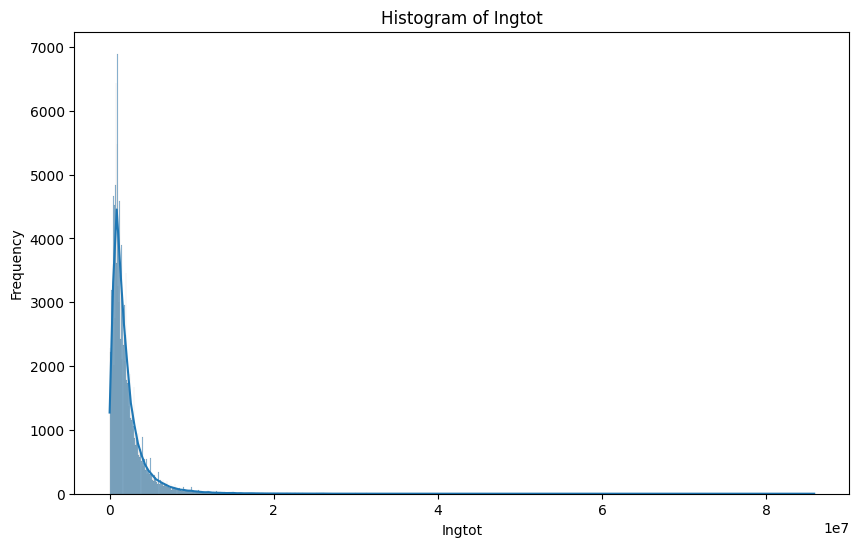

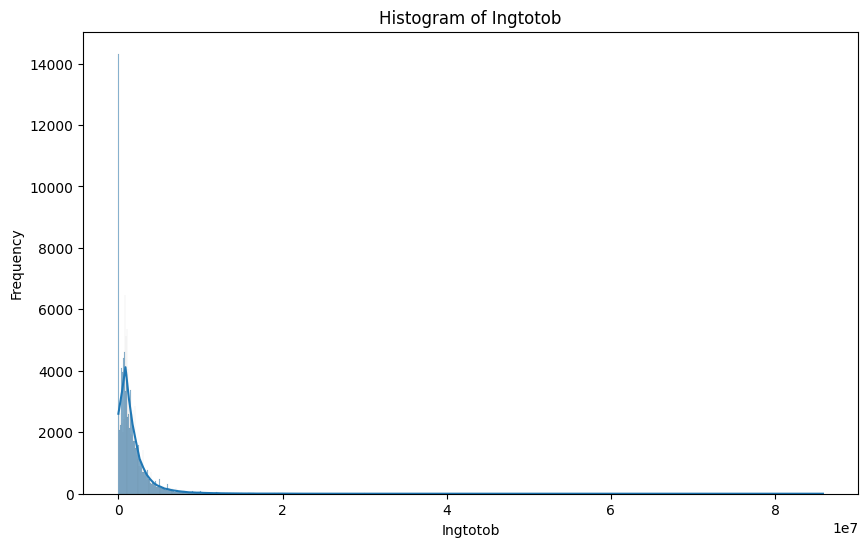

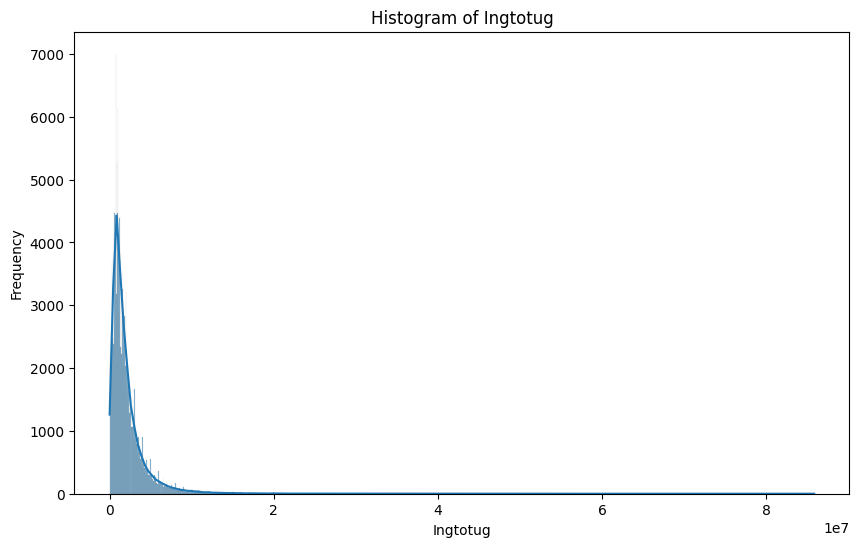

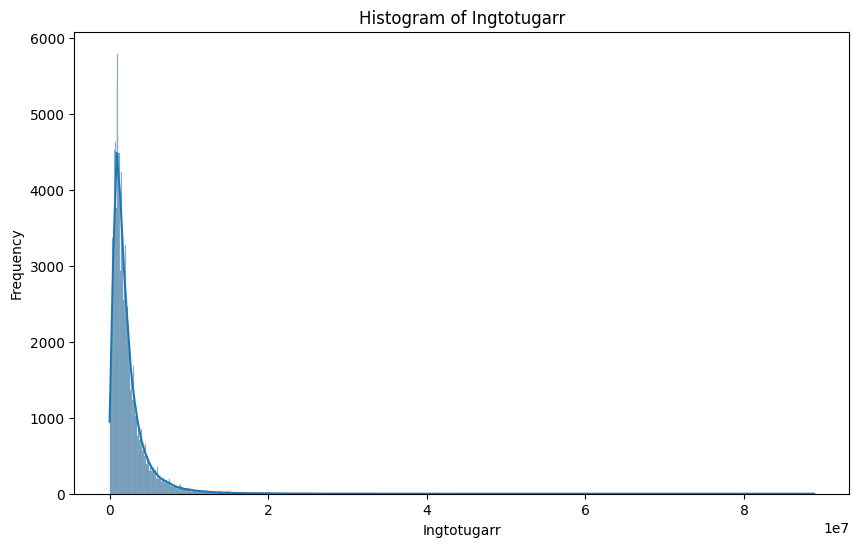

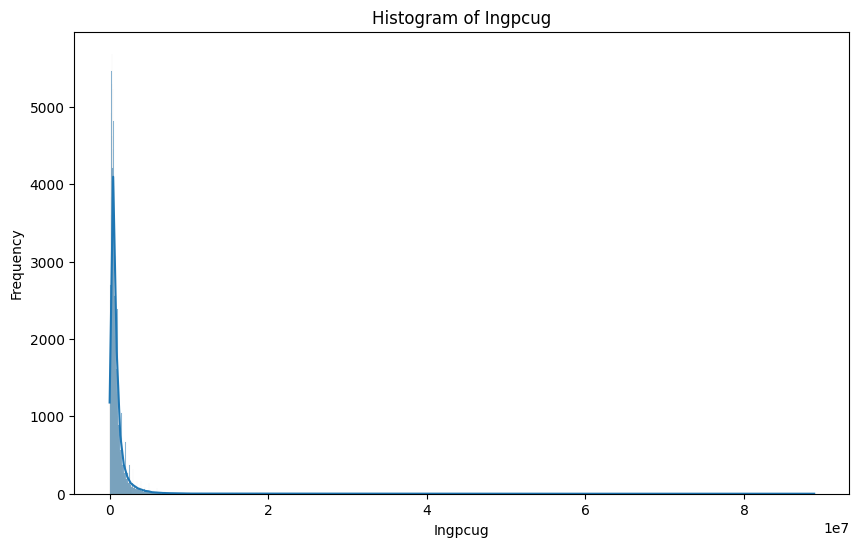

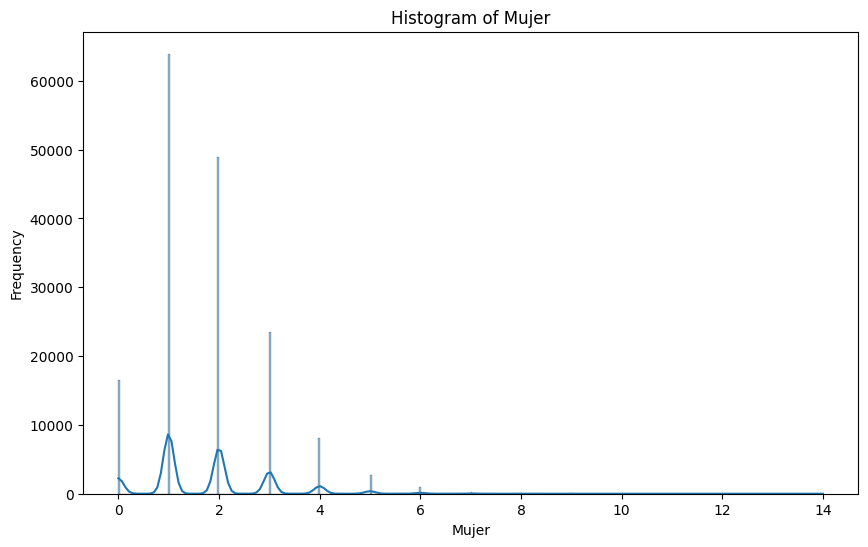

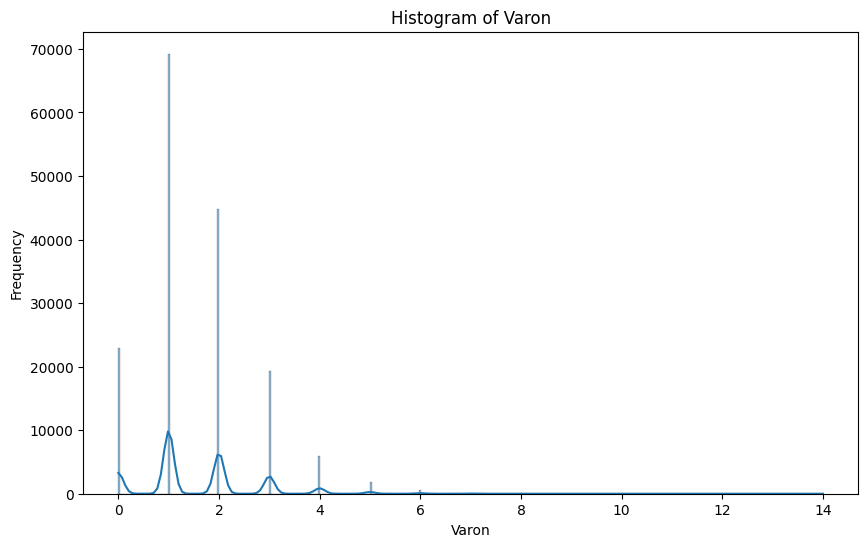

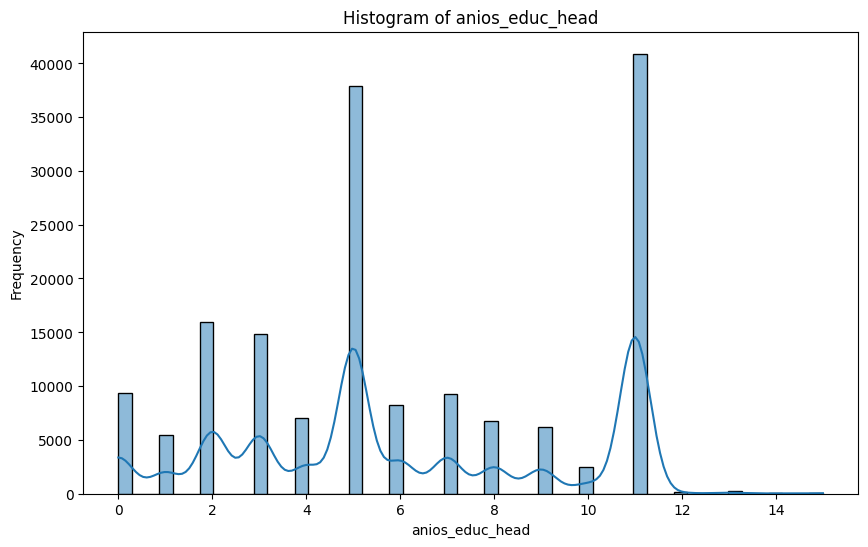

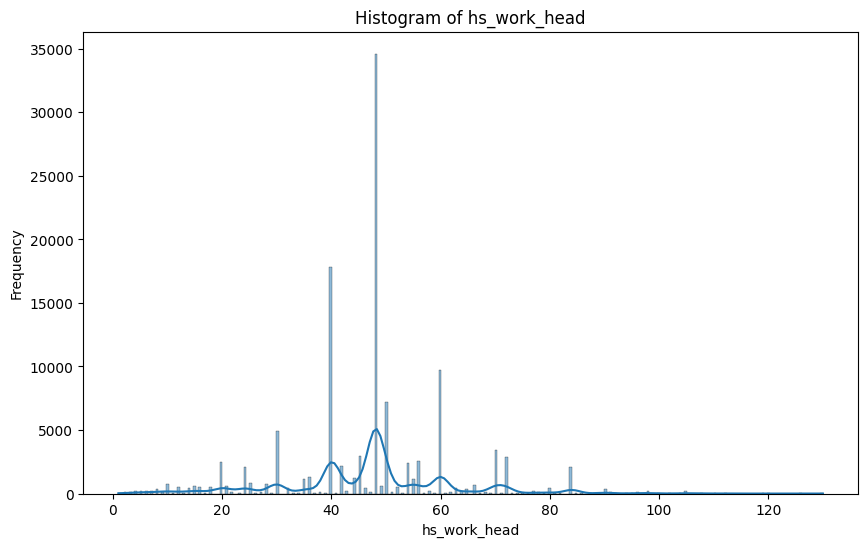

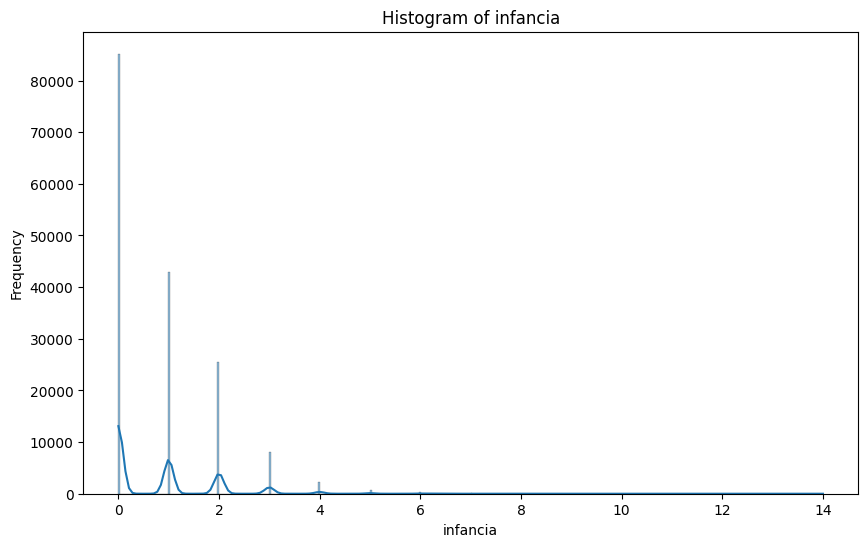

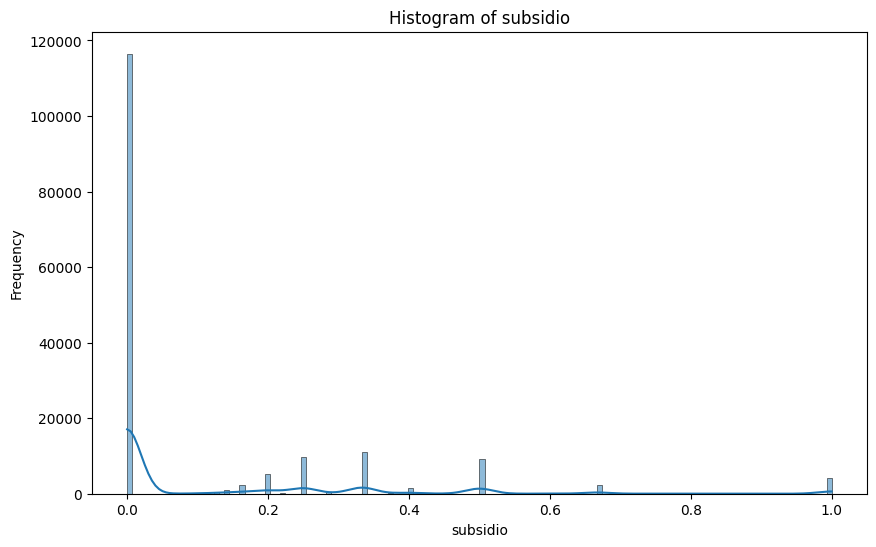

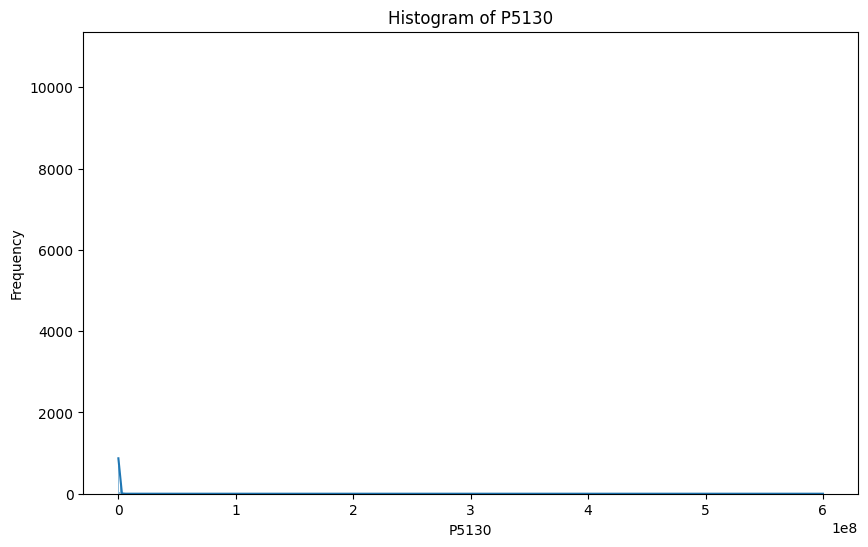

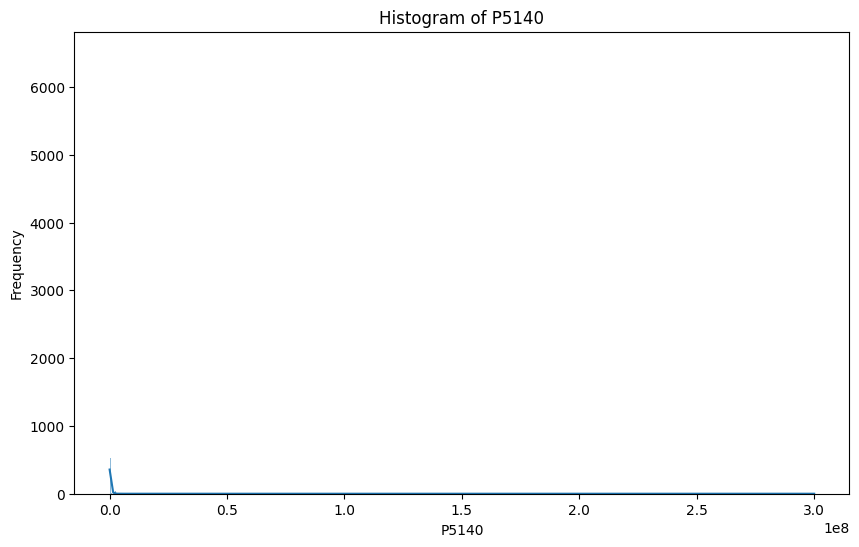

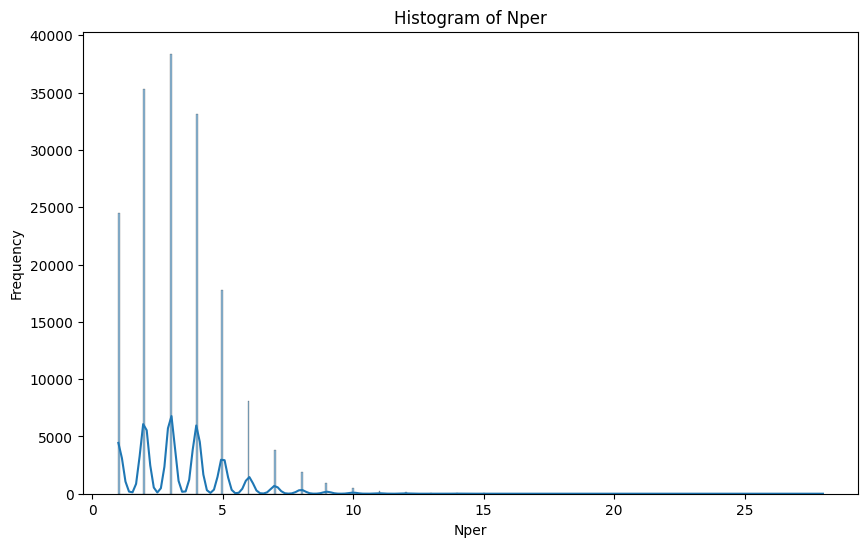

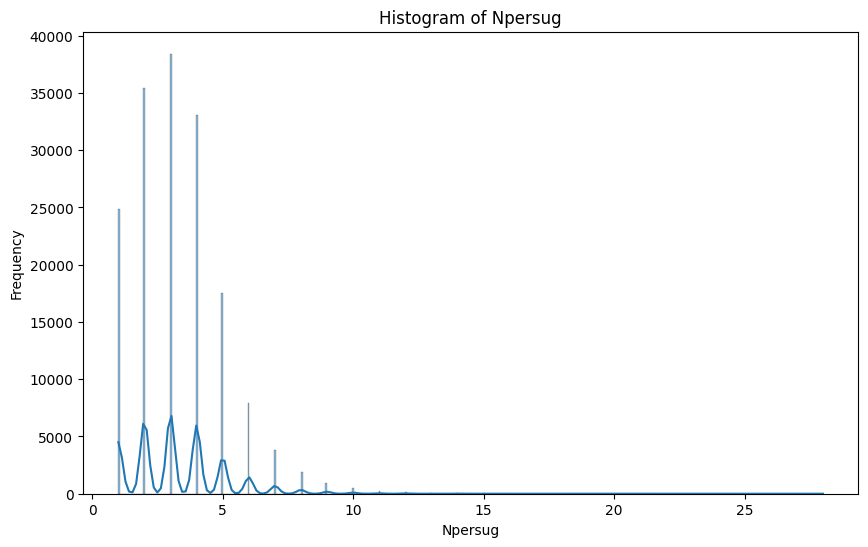

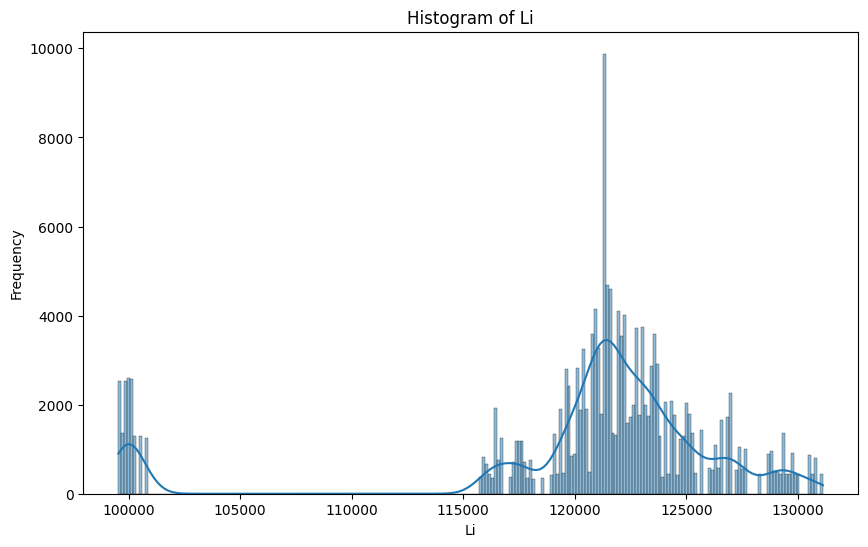

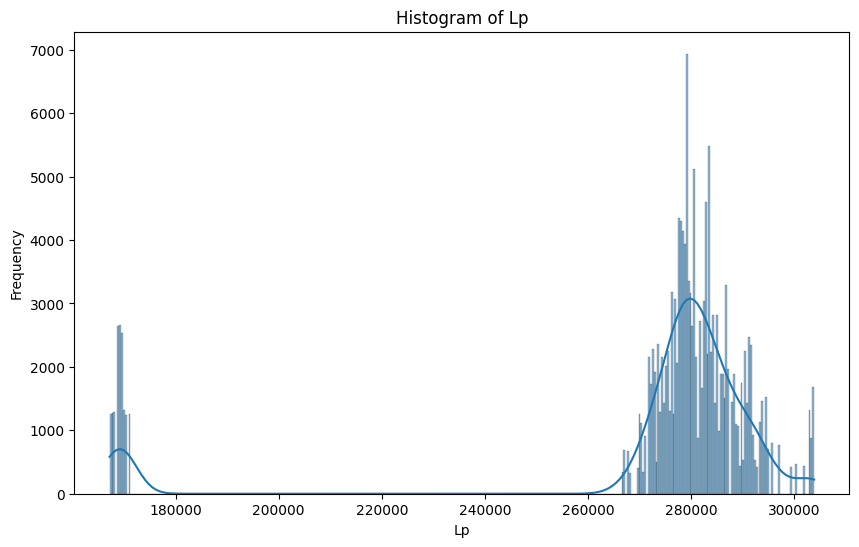

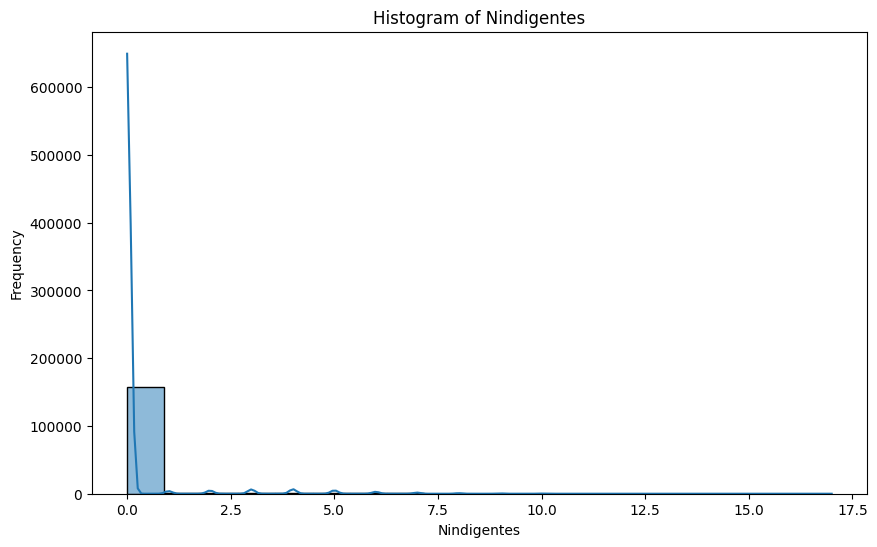

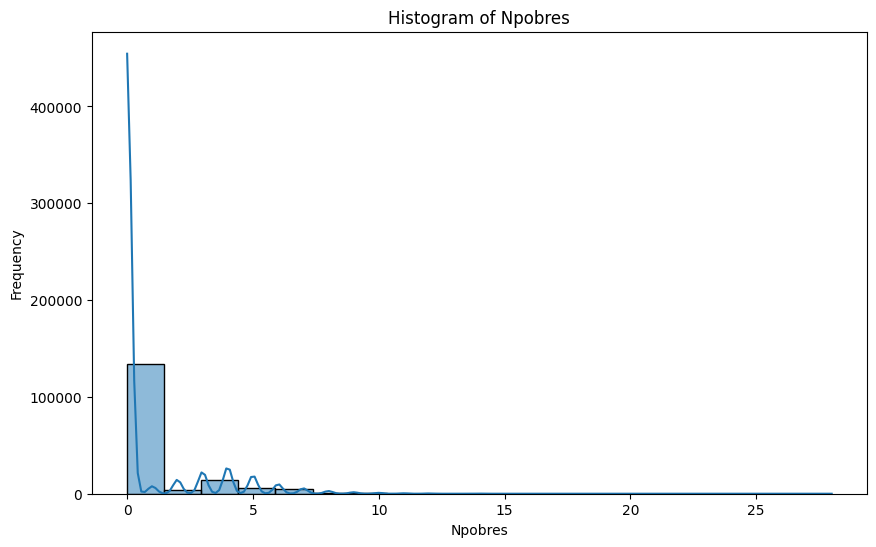

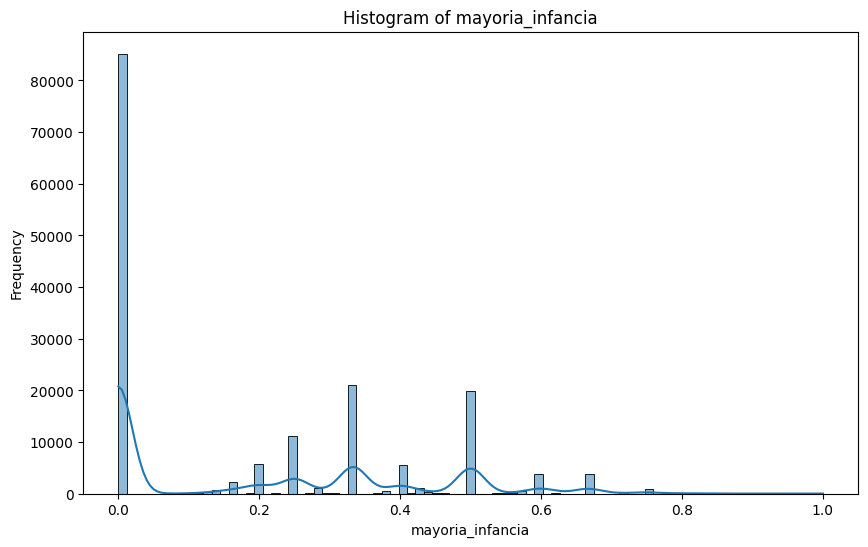

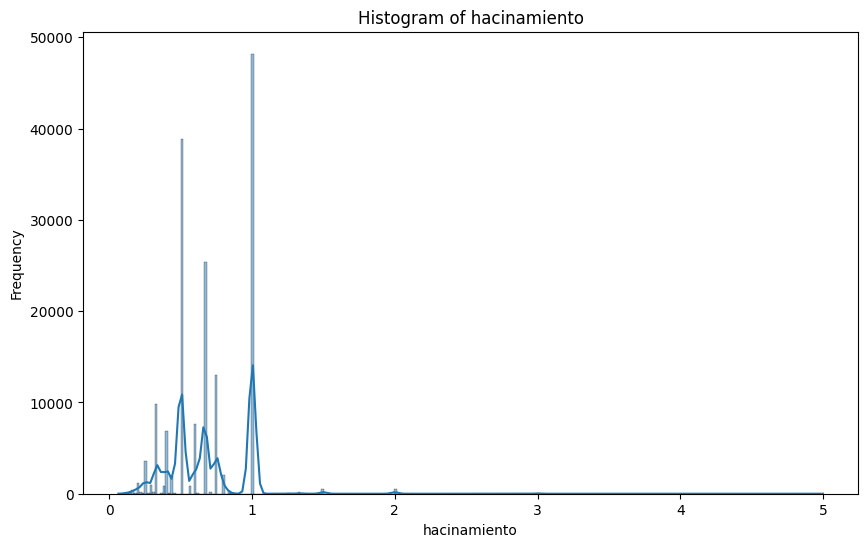

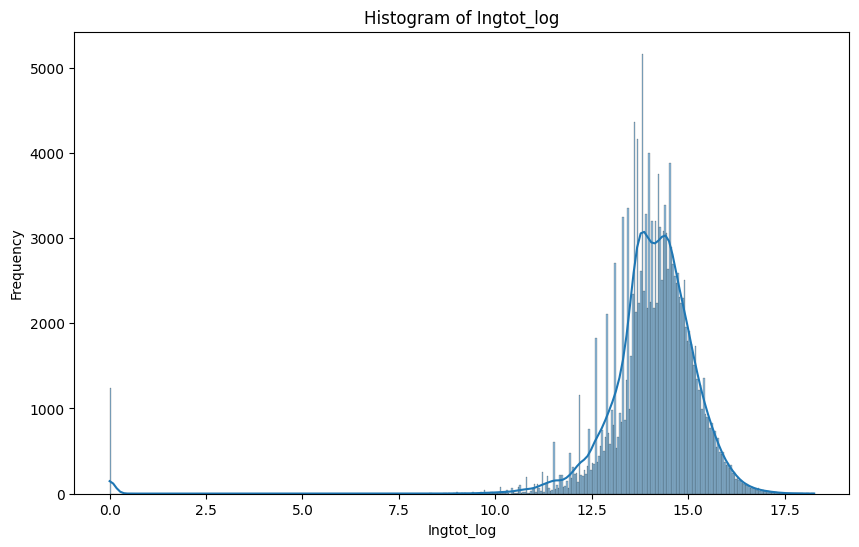

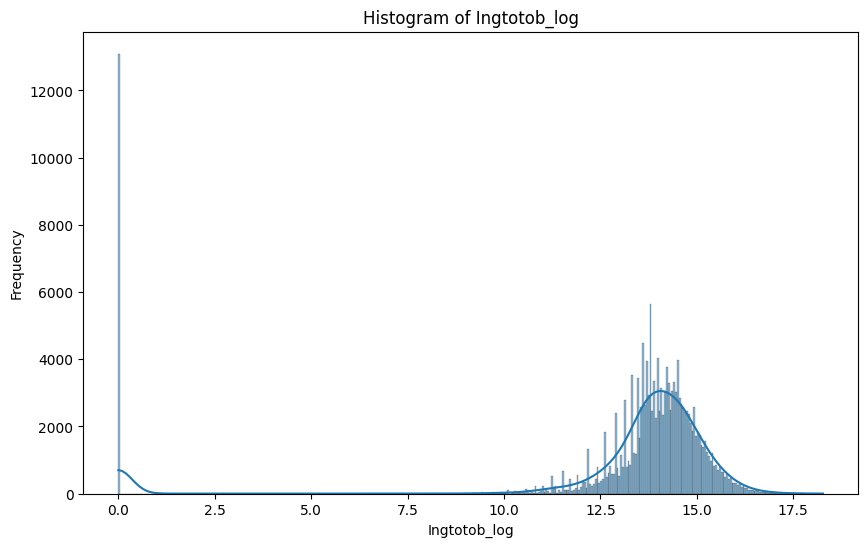

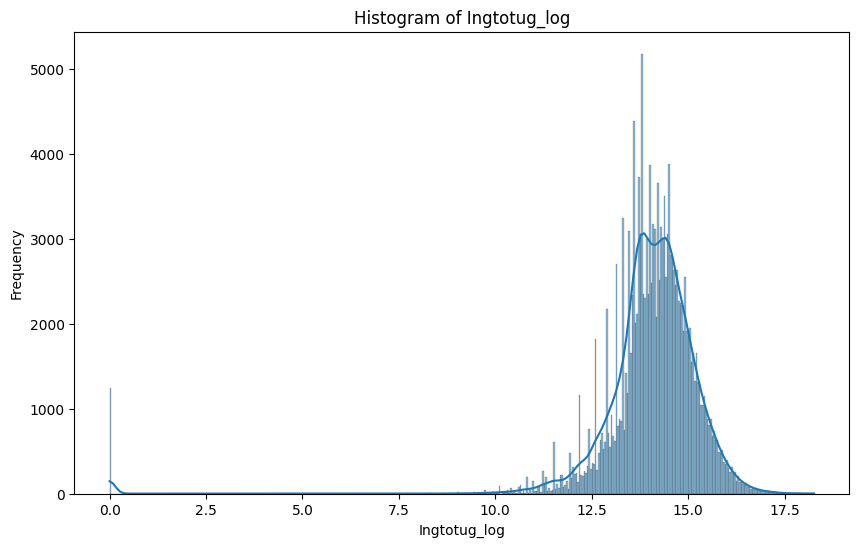

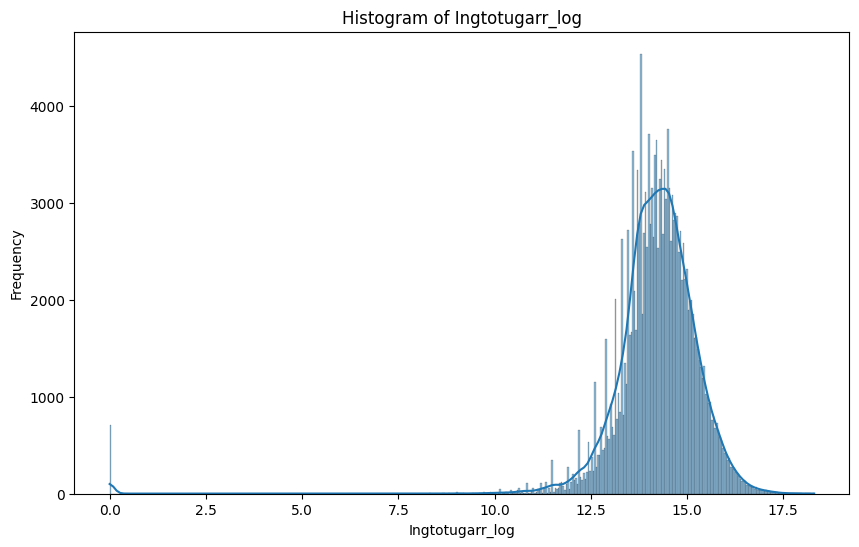

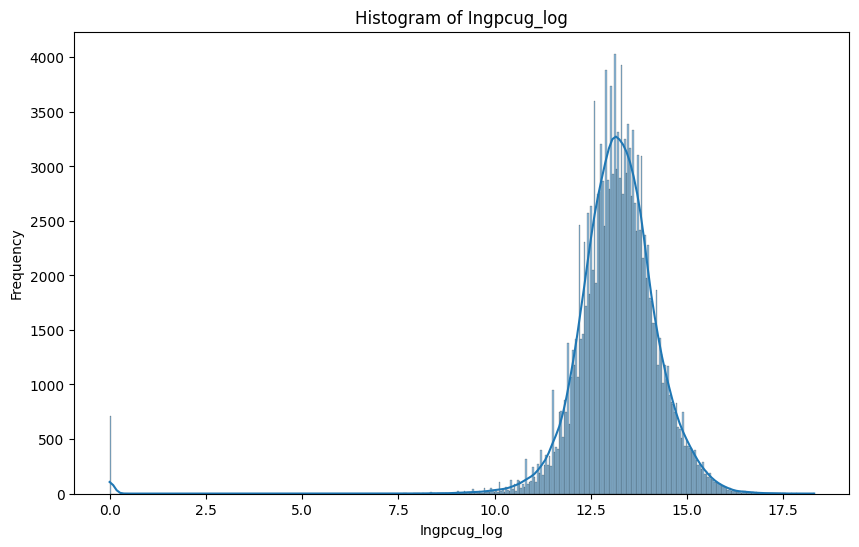

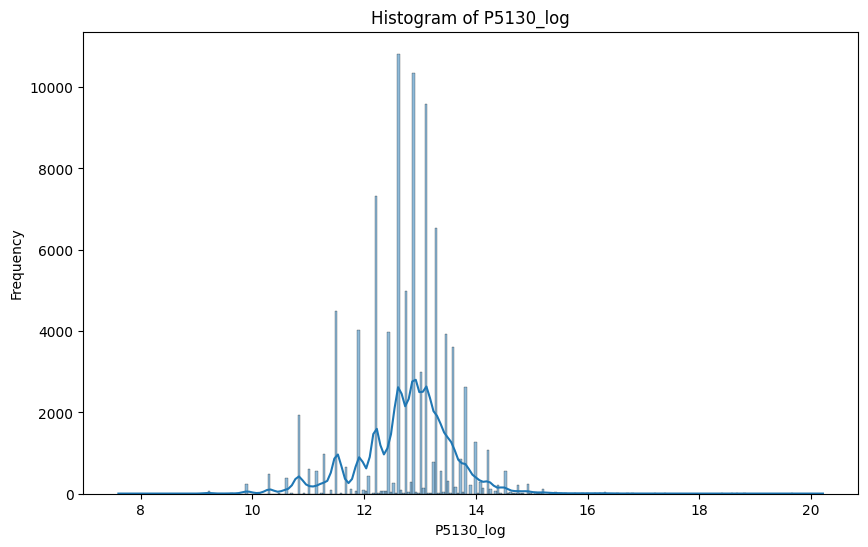

In [39]:
continuas = [
    'Ingtot', 'Ingtotob', 'Ingtotug', 'Ingtotugarr', 'Ingpcug',
      'Mujer', 'Varon', 'anios_educ_head', 'hs_work_head', 'infancia',
        'subsidio', 'P5130', 'P5140', 'Nper', 'Npersug', 'Li', 'Lp', 'Nindigentes',
          'Npobres', 'mayoria_infancia', 'hacinamiento', 'Ingtot_log', 'Ingtotob_log', 'Ingtotug_log', 'Ingtotugarr_log',
       'Ingpcug_log', 'P5130_log']

for var in continuas:
    if var in train_set.columns:  # Ensure the variable exists in the DataFrame
        filtered_data = train_set[var].dropna()  # Drop NaN values for this variable
        if not filtered_data.empty:  # Check if there are remaining observations
            print(f"Variable: {var}")
            print(f"Media: {filtered_data.mean():.2f}")  # Calculate mean
            print(f"Desvío Estándar: {filtered_data.std():.2f}")  # Calculate standard deviation
            print(f"Total de Observaciones: {filtered_data.shape[0]}")  # Count non-NaN observations
            print(f"Mínimo: {filtered_data.min():.2f}")  # Calculate minimum
            print(f"Máximo: {filtered_data.max():.2f}")  # Calculate maximum
            print("\n")
        else:
            print(f"Variable: {var} has no valid observations.\n")

# Create histograms for continuous variables

for var in continuas:
    if var in train_set.columns:
        filtered_data = train_set[var].dropna()
        if not filtered_data.empty:
            plt.figure(figsize=(10, 6))
            sns.histplot(filtered_data, kde=True)
            plt.title(f"Histogram of {var}")
            plt.xlabel(var)
            plt.ylabel("Frequency")
            plt.show()
            

In [10]:
# Subset of the dataset with dummy variables
dummies = [
    'ing_capital',
    'Pobre', 'Indigente', 
    'P5090_Alquilada', 'P5090_Otro', 'P5090_Propia', 'P5090_Tomada'
]


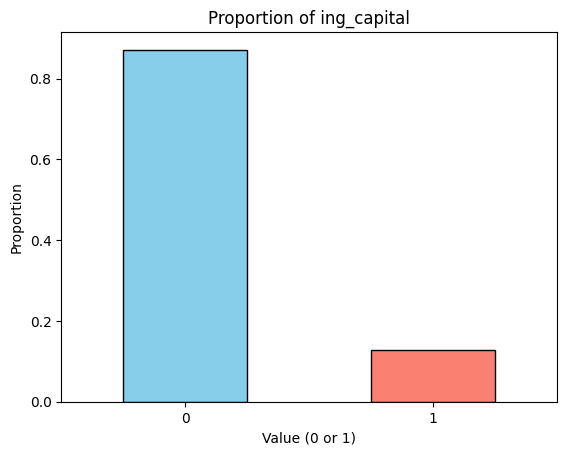

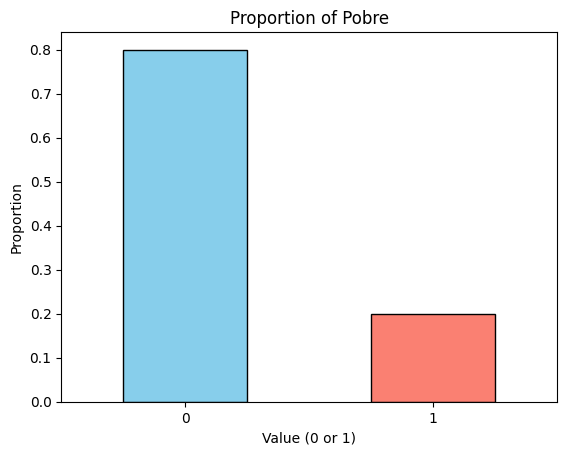

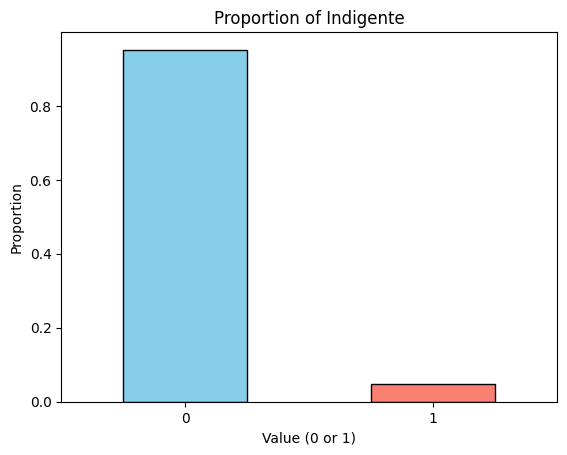

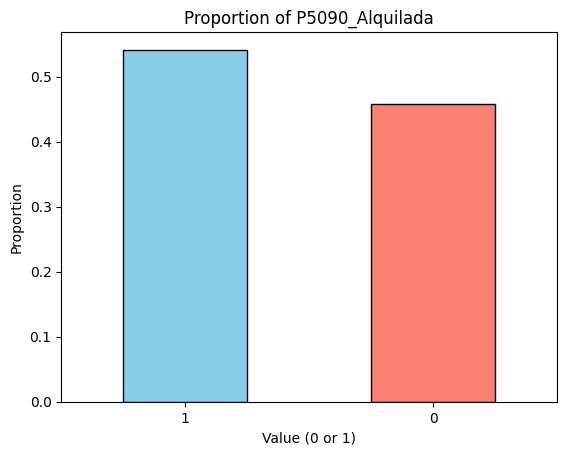

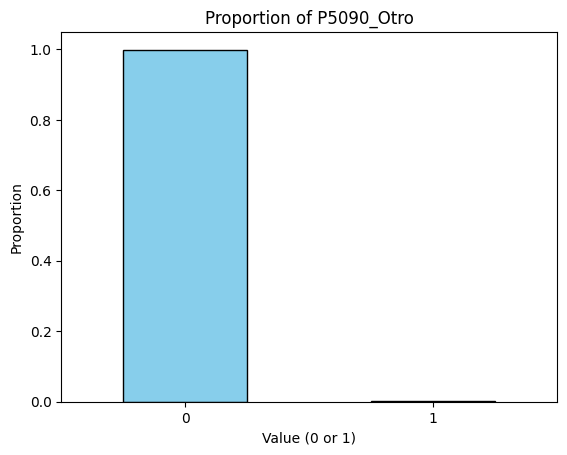

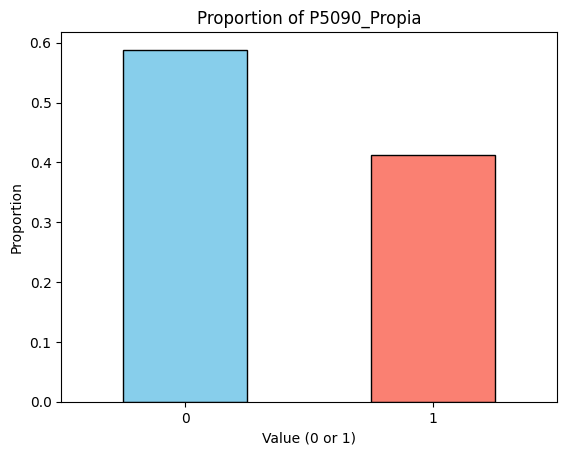

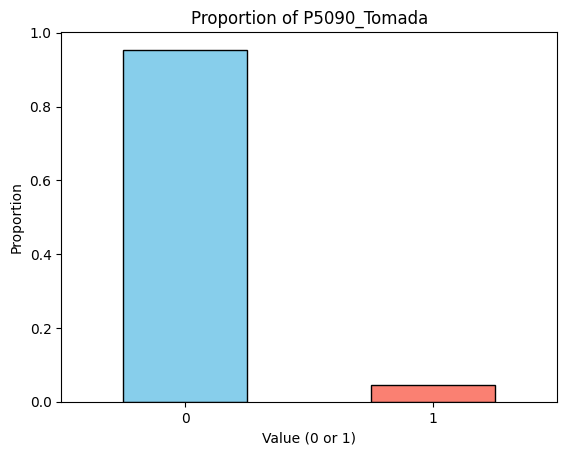

In [11]:
for var in dummies:
    if var in train_set.columns:
        proportions = train_set[var].value_counts(normalize=True)
        proportions.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
        plt.title(f"Proportion of {var}")
        plt.xlabel("Value (0 or 1)")
        plt.ylabel("Proportion")
        plt.xticks(rotation=0)
        plt.show()


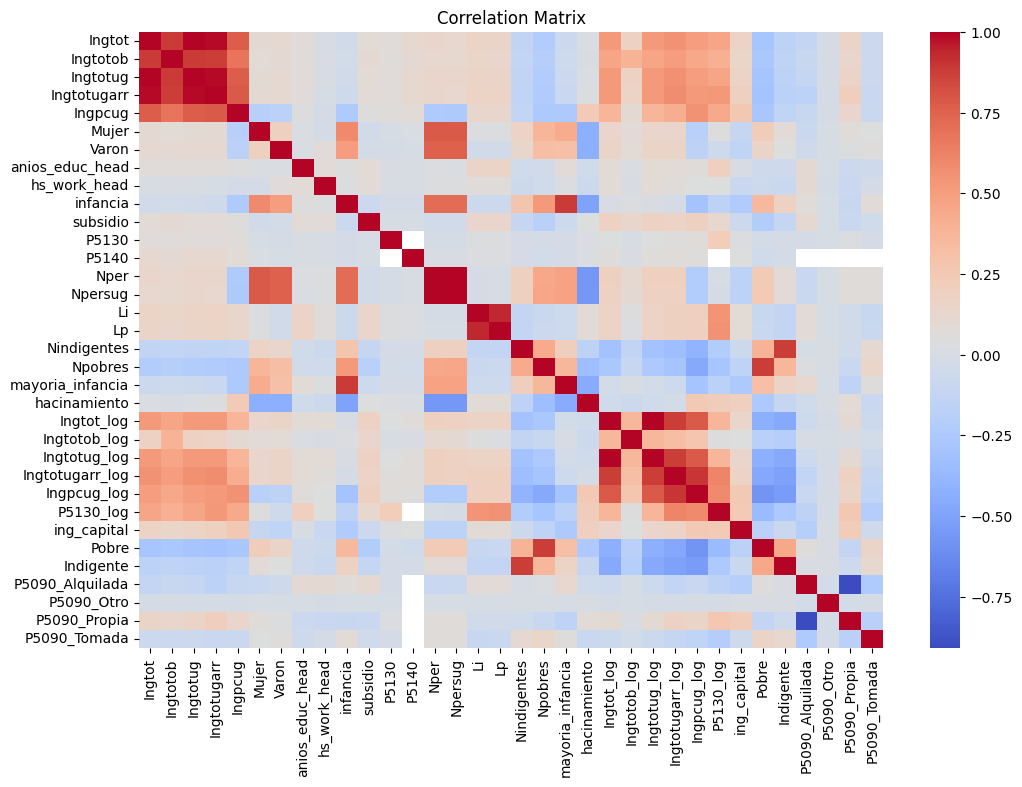

In [12]:
#  matriz de correlación

variables_matriz = continuas + dummies  
subset = train_set[variables_matriz]

corr = subset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [96]:
from sklearn.linear_model import ElasticNetCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score



In [98]:
predictors = [
     'Mujer', 'anios_educ_head', 'hacinamiento',
    'subsidio', 'P5130', 'P5140', 'Nper', 'mayoria_infancia', 'ing_capital', 'P5090_Tomada', 'P5090_Propia', 'P5090_Alquilada'
]

# Seleccionamos (predictoras) e y (variable objetivo)
X = train_set[predictors]
y = train_set['Ingtot']  # Variable objetivo: ingreso total del hogar


# Imputamos valores faltantes
imputer = SimpleImputer(strategy='median')  
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Escalamos las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)




Regresión Lineal

In [99]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=123)

# Ajustar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = linear_model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

# Coeficientes del modelo
coeficientes = pd.DataFrame({
    "Predictor": predictors,
    "Coeficiente": linear_model.coef_
})

print(coeficientes)

Mean Squared Error: 5908974350972.09
R2 Score: 0.05
           Predictor  Coeficiente
0              Mujer    -49520.28
1    anios_educ_head    186205.98
2       hacinamiento    166213.85
3           subsidio    250234.59
4              P5130    109295.00
5              P5140    340828.14
6               Nper    681566.13
7   mayoria_infancia   -296351.75
8        ing_capital    381220.44
9       P5090_Tomada     -9971.18
10      P5090_Propia    483401.54
11   P5090_Alquilada    258812.01


In [ ]:
# ELASTIC NET (NO TERMINA DE CORRER)

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Selección de predictores y variable objetivo
X = train_set[predictors]
y = train_set['Ingtot']  # Variable objetivo

# Imputación de valores faltantes
imputer = SimpleImputer(strategy='median')  
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Estandarización
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Espacio de búsqueda para los hiperparámetros
params = {
    'alpha': np.logspace(-5, 5, 100),  # Valores para alpha
    'l1_ratio': np.arange(0, 1, 0.01)  # Valores para l1_ratio
}

# Modelo base
regressor = ElasticNet()

# RandomizedSearchCV
rs_cv = RandomizedSearchCV(
    regressor,
    params,
    n_iter=100,  # Número de combinaciones aleatorias a probar
    scoring='neg_mean_squared_error',  # Métrica de evaluación
    cv=5,  # Validación cruzada
    verbose=1,  # Para ver el progreso
    random_state=42,
    refit=True
)

# Ajustar el modelo
rs_cv.fit(X_train, y_train)

# Predicciones
y_pred = rs_cv.predict(X_test)

# Métricas de evaluación
R2_score = r2_score(y_test, y_pred)
RMSE_score = np.sqrt(mean_squared_error(y_test, y_pred))

# Resultados
print(f"R2 Score: {R2_score:.2f}")
print(f"RMSE Score: {RMSE_score:.2f}")
print(f"Mejores Hiperparámetros: {rs_cv.best_params_}")

  


Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\milag\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.996e+17, tolerance: 6.706e+13
  model = cd_fast.enet_coordinate_descent(
c:\Users\milag\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.018e+17, tolerance: 6.733e+13
  model = cd_fast.enet_coordinate_descent(


KeyboardInterrupt: 

In [ ]:
# ESTE SI CORRE 

# Elastic Net
elastic_cv = ElasticNetCV(
    l1_ratio=0.5,  # Mezcla de penalización entre Lasso y Ridge
    n_alphas=500,  # Número de valores para alpha
    cv=5,  # Validación cruzada
    random_state=42
)

In [ ]:
# Ver los coeficientes computados
coeficientes = pd.DataFrame({
    'Predictor': X.columns,
    'Coeficiente': elastic_cv.coef_
})
print(coeficientes)

In [91]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicciones del modelo
y_pred = elastic_cv.predict(X_scaled)

# Calcular el Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Calcular el R2
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 6409979402275.85
R² Score: 0.00
